# Part 1 数据清洗

In [1]:
import json
import pandas as pd
import requests
import numpy as np

In [2]:
pd.set_option('display.max_colwidth',1000)

## 数据收集

In [3]:
# tweet_json
title={"id":"","created_at":"","retweet_count":"","favorite_count":"","full_text":"","retweeted_status":"","entities":""}   
column_name={"id":"","created_at":"","retweet_count":"","favorite_count":"","full_text":"","retweeted_status":"","expanded_url":""}      
title_list=title.keys()
df = pd.DataFrame(column_name,index=[])

In [4]:
#fu*k df =df.append()
for line in  open("tweet_json.txt",'r'):
    dict_line=json.loads(line)
    for x in list(dict_line):
        if x not in title_list:
            dict_line.pop(x)
    try:
        dict_line['expanded_url']=dict_line["entities"]["media"][0]["expanded_url"]
        dict_line.pop("entities")
    except:
        dict_line['expanded_url']=None
        dict_line.pop("entities")
    df=df.append(dict_line, ignore_index=True )    

In [5]:
# twitter-archive-enhanced
df_enhanced=pd.read_csv('twitter-archive-enhanced.csv')

In [6]:
#image-predictions.tsv
url='https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
response = requests.get(url).text
fh = open("image-predictions.tsv", 'w')
fh.write(response)
fh.close()
df_img=pd.read_csv("image-predictions.tsv",sep="\t")

## 数据评估
   1.只取含有url的非转发数据  
   2.teewt_json.txt作为twitter-archive-enhanced的补充，可以把需要的或者模糊的内容重新提取一次  
   3.df_img是对图片进行预测的结果  
   df  df_img df_enhanced

### 数据评估1 df_enhanced

In [7]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
df_enhanced[df_enhanced.retweeted_status_id.isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [9]:
df_enhanced[df_enhanced.retweeted_status_id.isnull()].name.value_counts().head()

None       680
a           55
Lucy        11
Charlie     11
Oliver      10
Name: name, dtype: int64

In [10]:
df_enhanced[df_enhanced.retweeted_status_id.isnull()].source.value_counts().head()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2042
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [11]:
df_enhanced[df_enhanced.retweeted_status_id.isnull()].pupper.value_counts().head()

None      1941
pupper     234
Name: pupper, dtype: int64

In [12]:
df_enhanced[df_enhanced.retweeted_status_id.isnull()].name.value_counts().head()

None       680
a           55
Lucy        11
Charlie     11
Oliver      10
Name: name, dtype: int64

### 数据评估2 df_img

In [13]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
df_img.p1_conf.describe()

count    2075.000000
mean        0.594548
std         0.271174
min         0.044333
25%         0.364412
50%         0.588230
75%         0.843855
max         1.000000
Name: p1_conf, dtype: float64

In [15]:
(df_img.p1_conf>df_img.p2_conf).value_counts()

True    2075
dtype: int64

In [16]:
# df_img[['p1_dog','p1_conf','p1','jpg_url']]    
df_img[df_img.p1_dog==False][['p1_dog','p1_conf','p1','jpg_url',"tweet_id"]].head()
# img_temp[img_temp.p1.isin(['seat_belt','web_site','teddy'])]

,p1_dog,p1_conf,p1,jpg_url,tweet_id
6,False,0.933012,box_turtle,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,666051853826850816
8,False,0.962465,shopping_cart,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,666057090499244032
17,False,0.965932,hen,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,666104133288665088
18,False,0.086502,desktop_computer,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,666268910803644416
21,False,0.914671,three-toed_sloth,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,666293911632134144


### 数据评估3 df_tweet_json

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 7 columns):
created_at          2352 non-null object
expanded_url        2073 non-null object
favorite_count      2352 non-null object
full_text           2352 non-null object
id                  2352 non-null object
retweet_count       2352 non-null object
retweeted_status    177 non-null object
dtypes: object(7)
memory usage: 128.7+ KB


In [18]:
df.sample(3)

,created_at,expanded_url,favorite_count,full_text,id,retweet_count,retweeted_status
1683,Mon Dec 28 20:57:50 +0000 2015,https://twitter.com/dog_rates/status/681579835668455424/photo/1,3873,This is Apollo. He thought you weren't coming back so he had a mental breakdown. 8/10 we've all been there https://t.co/ojUBrDCHLT,681579835668455424,1483,NaN
1365,Wed Feb 24 03:21:41 +0000 2016,None,3483,This is Rudy. He's going to be a star. 13/10 talented af (vid by @madalynrossi) https://t.co/Dph4FDGoMd,702332542343577600,1740,NaN
1975,Sat Dec 05 03:28:25 +0000 2015,https://twitter.com/dog_rates/status/672980819271634944/photo/1,1921,Extraordinary dog here. Looks large. Just a head. No body. Rather intrusive. 5/10 would still pet https://t.co/ufHWUFA9Pu,672980819271634944,1071,NaN


In [19]:
df.id.value_counts().head()

667495797102141441    1
746757706116112384    1
732375214819057664    1
676897532954456065    1
838201503651401729    1
Name: id, dtype: int64

## 定义问题
### 1. df_enhanced
#### 质量问题
1.删除转发的，包含图片的  
2.删除错误的姓名   
3.修改日期类型  
4.修改评分的类型  
5.将狗狗的身份改为数字  
#### 清洁度问题 
A.删除转发的内容      
B.删除多余的转发字段、回复字段和评分的分子分母字段 

###  2.df_tweet_json
#### 质量问题
1.日期（格式不清楚这样方不方便排序，需要改成日期类型）  
2.favorite_count  改成int   
3.retweet_count  改成int      
4.评分的分子分母  改成int    
5.填充name的空值为None    
6.将提取到的错误狗狗name，替换成None    
7.需要从full_text中取出评分 用正则提取 （评分）     
8.需要从full_text中提取狗狗名字    
9.需要从full_text中提取狗狗 "地位" (即 doggo、floofer、pupper 和 puppo)。  

 #### 清洁度问题 
A.需要将评分拆分成两列，一列是分子，一列分母    
B.计算分数比值，删除分子分母字段  
C.删除转发的tweet

###  3.df_img
#### 质量问题
空
#### 清洁度问题 
空

## 备份和清洗数据
### df_enh_clean

In [20]:
df_enhan_clean = df_enhanced

In [21]:
# 1.删除转发数据
df_enhan_clean = df_enhan_clean[df_enhanced.retweeted_status_id.isnull()]

In [22]:
#5.将狗狗的身份改为数字
staus_list=['doggo','pupper','puppo','floofer']
for status in staus_list:
    df_enhan_clean[status]=df_enhan_clean[status].isin([status]) 
    df_enhan_clean[status].loc[df_enhan_clean[status]==True]=1
    df_enhan_clean[status]=df_enhan_clean[status].astype(int)
    

d:\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
d:\anaconda\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
d:\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
d:\anaconda\lib\site-packages\ipykernel_l

In [23]:
df_enhan_clean.floofer.value_counts()

0    2165
1      10
Name: floofer, dtype: int64

In [24]:
# B 5 计算评分比例，并修改格式
df_enhan_clean['score']=df_enhan_clean['rating_numerator']/df_enhan_clean['rating_denominator']*1.0
df_enhan_clean['score'][df_enhan_clean.tweet_id==835246439529840640]=13/10
df_enhan_clean['score']=df_enhan_clean['score'].round(2)

d:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
d:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
d:\anaconda\lib\site-packages\pandas\core\generic.py:5984: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
d:\anaconda\li

In [25]:
df_enhan_clean['score'].value_counts()

1.20      504
1.00      444
1.10      431
1.30      308
0.90      156
0.80       98
0.70       53
1.40       43
0.50       37
0.60       32
0.30       19
0.40       15
0.20       11
0.10        7
0.00        2
42.00       2
1.70        1
2.70        1
18.20       1
2.60        1
0.82        1
177.60      1
0.73        1
0.64        1
1.25        1
7.50        1
1.50        1
66.60       1
3.43        1
Name: score, dtype: int64

In [26]:
# 删除多余字段
df_enhan_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True)
df_enhan_clean.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1,inplace=True)
df_enhan_clean.drop(['rating_numerator','rating_denominator'],axis=1,inplace=True)

d:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
d:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
d:\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [27]:
df_enhan_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id         2175 non-null int64
timestamp        2175 non-null object
source           2175 non-null object
text             2175 non-null object
expanded_urls    2117 non-null object
name             2175 non-null object
doggo            2175 non-null int32
floofer          2175 non-null int32
pupper           2175 non-null int32
puppo            2175 non-null int32
score            2175 non-null float64
dtypes: float64(1), int32(4), int64(1), object(5)
memory usage: 169.9+ KB


In [28]:
df_enhan_clean.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,score
1757,678764513869611008,2015-12-21 02:30:45 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Wilson. He got caught humping the futon. He's like ""dude, help me out here"" 10/10 I'd help Wilson out https://t.co/m6XoclB0qv",https://twitter.com/dog_rates/status/678764513869611008/photo/1,Wilson,0,0,0,0,1.0
1201,716447146686459905,2016-04-03 02:08:05 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Ozzy. He's acrobatic af. Legendary pupper status achieved. 13/10 https://t.co/gHWsCTu90E,https://vine.co/v/eMmXVPn5eQK,Ozzy,0,0,1,0,1.3
668,790277117346975746,2016-10-23 19:42:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bruce. He never backs down from a challenge. 11/10 you got this Bruce https://t.co/aI7umZHIq7,https://twitter.com/dog_rates/status/790277117346975746/photo/1,Bruce,0,0,0,0,1.1


In [29]:
df_enhan_clean.to_csv('df_enhan_clean.csv',index=False,header=True)

## 备份和清洗数据
### df_tweet_json
#### 质量问题
0.删除转发的tweet
1.日期（格式不清楚这样方不方便排序，需要改成日期类型）  
2.favorite_count  改成int   
3.retweet_count  改成int      
4.评分的分子分母  改成int    
5.填充name的空值为None    
6.将提取到的错误狗狗name，替换成None    
7.需要从full_text中取出评分 用正则提取 （评分）     
8.需要从full_text中提取狗狗名字    
9.需要从full_text中提取狗狗 "地位" (即 doggo、floofer、pupper 和 puppo)。  

 #### 清洁度问题 
A.需要将评分拆分成两列，一列是分子，一列分母    
B.计算分数比值，删除分子分母字段  

In [30]:
#df.to_csv('df_raw.csv',index=False,header=True)
df_clean = df 

In [31]:
len(df_clean)

2352

In [32]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 7 columns):
created_at          2352 non-null object
expanded_url        2073 non-null object
favorite_count      2352 non-null object
full_text           2352 non-null object
id                  2352 non-null object
retweet_count       2352 non-null object
retweeted_status    177 non-null object
dtypes: object(7)
memory usage: 128.7+ KB


In [33]:
#0.删除转发的tweet
df_clean = df_clean[df_clean.retweeted_status.isnull()] 

In [34]:
#提取评分和名字
#基本思想：先挑出来，再筛选，多做几步暂时没关系。
# df_clean['score'] = df_clean['full_text'].str.extract('(\d+\.\d+\/\d+|\d+\/\d+)',expand=False)

#7.需要从full_text中取出评分 用正则提取 （评分）     
#8.需要从full_text中提取狗狗名字   
score_li=[]
for x in df_clean['full_text'].str.findall('(\d+\.\d+\/\d+|\d+\/\d+)'):
    try:
        score_li.append(x[1])
    except:
        score_li.append(x[0])
df_clean['score']=score_li
df_clean['name']  = df_clean['full_text'].str.extract('(Meet\s\w+|Say\shello\sto\s\w+|named\s\w+)', expand=False).str.split(' ').str[-1]
df_clean['name'][df_clean['name'].isnull()]=(df_clean['full_text'][df_clean['name'].isnull()]).str.extract('(This\sis\s\w+)', expand=False).str.split(' ').str[-1]

d:\anaconda\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
d:\anaconda\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
d:\anaconda\lib\site-packages\pandas\core\generic.py:5984: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
d:\anaconda\lib\sit

In [35]:
#test name
df_name_temp = pd.Series(df_clean['name'].unique())
df_name_temp[df_name_temp.str[0] >"Z"].tolist()

['such',
 'quite',
 'not',
 'one',
 'incredibly',
 'a',
 'very',
 'my',
 'his',
 'an',
 'actually',
 'just',
 'getting',
 'mad',
 'this',
 'unacceptable',
 'all',
 'old',
 'infuriating',
 'the',
 'by',
 'officially',
 'life',
 'light',
 'space']

In [36]:
#6.将提取到的错误狗狗name，替换成None  
bad_words=['such',
 'quite',
 'not',
 'one',
 'incredibly',
 'mad',
 'an',
 'very',
 'a',
 'just',
 'my',
 'his',
 'actually',
 'getting',
 'this',
 'unacceptable',
 'all',
 'old',
 'infuriating',
 'the',
 'by',
 'officially',
 'life',
 'light',
 'space']
df_clean['name'][df_clean['name'].isin(bad_words)] = None 
df_clean['name'][df_clean['name'].isnull()] = None 

d:\anaconda\lib\site-packages\pandas\core\generic.py:5984: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
d:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [37]:
#test name
df_clean['name'].sample(20)

1065        None
1200        None
1072       Benji
116     Clifford
2176    Terrance
1264       Cecil
1080        None
1296     Jiminus
1257        Lacy
1898        None
780      Maximus
2305     Jockson
153       Hobbes
510         None
760       Sophie
1478       Oscar
1619       Perry
1336        None
1819        None
1465        Lola
Name: name, dtype: object

In [38]:
#test name
df_clean['name'].value_counts().head(10)

Lucy       11
Charlie    11
Oliver     10
Cooper     10
Tucker      9
Penny       9
Lola        8
Winston     8
Sadie       8
Daisy       7
Name: name, dtype: int64

In [39]:
# If 没法和pandas一起用
#df_clean['doggo'] = 1 if  ~df_clean['full_text'].str.find(sub='doggo').isin([-1]) else 0
#df_clean['floofer'] = 1 if "floofer" in df_clean['full_text'] else 0

###警告
# df_clean[status].loc[df_clean[status]==True]=1
# A value is trying to be set on a copy of a slice from a DataFrame

#需要逻辑判断部分加了.loc之后，就少了几个提示，还剩一个不知哪里的。

###9.需要从full_text中提取狗狗 "地位" (即 doggo、floofer、pupper 和 puppo)。  
staus_list =['doggo','floof','pupper','puppo']
for status in staus_list:
    df_clean[status]=~df_clean['full_text'].str.find(sub=status).isin([-1]) 
    df_clean[status].loc[df_clean[status]==True]=1
    df_clean[status]=df_clean[status].astype(int)

d:\anaconda\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
d:\anaconda\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
d:\anaconda\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
d:\anaconda\lib\site-packages\ipykernel_l

In [40]:
df_clean.sample(10)

,created_at,expanded_url,favorite_count,full_text,id,retweet_count,retweeted_status,score,name,doggo,floof,pupper,puppo
2227,Sun Nov 22 00:34:50 +0000 2015,https://twitter.com/dog_rates/status/668226093875376128/photo/1,322,Sneaky dog here. Tuba player has no clue. 10/10 super sneaky https://t.co/jWVwSppaa2,668226093875376128,115,NaN,10/10,None,0,0,0,0
2316,Tue Nov 17 02:06:42 +0000 2015,https://twitter.com/dog_rates/status/666437273139982337/photo/1,131,Here we see a lone northeastern Cumberbatch. Half ladybug. Only builds with bricks. Very confident with body. 7/10 https://t.co/7LtjBS0GPK,666437273139982337,52,NaN,7/10,None,0,0,0,0
348,Tue Feb 14 02:02:51 +0000 2017,https://twitter.com/dog_rates/status/831322785565769729/photo/1,10011,This is Pete. He has no eyes. Needs a guide doggo. Also appears to be considerably fluffy af. 12/10 would hug softly https://t.co/Xc0gyovCtK,831322785565769729,1737,NaN,12/10,Pete,1,0,0,0
2104,Sat Nov 28 04:03:11 +0000 2015,https://twitter.com/dog_rates/status/670452855871037440/photo/1,577,This dog can't see its haters. 11/10 https://t.co/35BcGFdEAK,670452855871037440,223,NaN,11/10,None,0,0,0,0
1581,Tue Jan 12 16:25:26 +0000 2016,https://twitter.com/dog_rates/status/686947101016735744/photo/1,9390,This is Jackson. He was specifically told not to sleep in the fridge. Damn it Jackson. 11/10 would squeeze softly https://t.co/lJs10ZJsgj,686947101016735744,3570,NaN,11/10,Jackson,0,0,0,0
1735,Wed Dec 23 03:58:25 +0000 2015,https://twitter.com/dog_rates/status/679511351870550016/photo/1,3694,Say hello to William. He makes fun of others because he's terrified of his own deep-seated insecurities. 7/10 https://t.co/bwuV6FlRxr,679511351870550016,1454,NaN,7/10,William,0,0,0,0
153,Mon May 08 00:54:59 +0000 2017,https://twitter.com/dog_rates/status/861383897657036800/photo/1,37599,This is Hobbes. He's never seen bubbles before. 13/10 deep breaths buddy https://t.co/QFRlbZw4Z1,861383897657036800,11456,NaN,13/10,Hobbes,0,0,0,0
1166,Fri Apr 15 00:46:48 +0000 2016,https://twitter.com/dog_rates/status/720775346191278080/photo/1,2689,This is Berkeley. He's in a predicament. 10/10 someone help him https://t.co/XSEXdQupej,720775346191278080,754,NaN,10/10,Berkeley,0,0,0,0
1018,Sat Jun 25 03:17:46 +0000 2016,None,5497,Here's a golden floofer helping with the groceries. Bed got in way. Still 11/10 helpful af (vid by @categoen) https://t.co/6ZRoZUWFmd,746542875601690625,2095,NaN,11/10,None,0,1,0,0
1092,Sat May 28 01:18:00 +0000 2016,https://twitter.com/dog_rates/status/736365877722001409/photo/1,4353,This is Rory. He's extremely impatient. 11/10 settle down pupper https://t.co/e3tfXJLi40,736365877722001409,1401,NaN,11/10,Rory,0,0,1,0


In [41]:
#4.评分的分子分母  改成int 
#A.需要将评分拆分成两列，一列是分子，一列分母    

score_temp = df_clean['score'].str.split('/',expand=True)
###B.计算分数比值
df_clean['score']= score_temp[0].astype(float)/score_temp[1].astype(float)
df_clean['score']=df_clean['score'].round(2)

d:\anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
d:\anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [42]:
df_clean['score'].value_counts()

1.20      503
1.00      436
1.10      432
1.30      311
0.90      156
0.80      101
0.70       56
1.40       44
0.60       33
0.50       33
0.30       19
0.40       16
0.20       11
0.10        8
1.13        2
0.00        2
42.00       2
1.35        1
0.98        1
177.60      1
66.60       1
0.95        1
0.73        1
1.25        1
18.20       1
1.50        1
3.43        1
Name: score, dtype: int64

In [43]:
df_clean['score'].isnull().value_counts()

False    2175
Name: score, dtype: int64

In [44]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2351
Data columns (total 13 columns):
created_at          2175 non-null object
expanded_url        1994 non-null object
favorite_count      2175 non-null object
full_text           2175 non-null object
id                  2175 non-null object
retweet_count       2175 non-null object
retweeted_status    0 non-null object
score               2175 non-null float64
name                1411 non-null object
doggo               2175 non-null int32
floof               2175 non-null int32
pupper              2175 non-null int32
puppo               2175 non-null int32
dtypes: float64(1), int32(4), object(8)
memory usage: 283.9+ KB


In [45]:
df_clean.sample(3)

,created_at,expanded_url,favorite_count,full_text,id,retweet_count,retweeted_status,score,name,doggo,floof,pupper,puppo
1430,Wed Feb 10 04:06:43 +0000 2016,https://twitter.com/dog_rates/status/697270446429966336/photo/1,5102,This is Bentley. He got stuck on his 3rd homework problem. Picturing the best case scenario if he drops out. 10/10 https://t.co/7rS33sCKMS,697270446429966336,2080,NaN,1.0,Bentley,0,0,0,0
1475,Sat Jan 30 23:51:19 +0000 2016,None,1800,Personally I'd give him an 11/10. Not sure why you think you're qualified to rate such a stellar pup.\n@CommonWhiteGirI,693582294167244802,291,NaN,1.1,None,0,0,0,0
1994,Thu Dec 03 22:09:14 +0000 2015,https://twitter.com/dog_rates/status/672538107540070400/photo/1,1085,Meet Darby. He's a Fiscal Tutankhamen Waxbeard. Really likes steak. 7/10 https://t.co/rSndxTL0Ap,672538107540070400,402,NaN,0.7,Darby,0,0,0,0


In [46]:
#1.日期（格式不清楚这样方不方便排序，需要改成日期类型）  
#2.favorite_count  改成int   
3#.retweet_count  改成int      
 
df_clean.created_at=pd.to_datetime(df_clean.created_at)
df_clean.favorite_count=df_clean.favorite_count.astype("int")
df_clean.retweet_count=df_clean.retweet_count.astype("int")

d:\anaconda\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [47]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2351
Data columns (total 13 columns):
created_at          2175 non-null datetime64[ns]
expanded_url        1994 non-null object
favorite_count      2175 non-null int32
full_text           2175 non-null object
id                  2175 non-null object
retweet_count       2175 non-null int32
retweeted_status    0 non-null object
score               2175 non-null float64
name                1411 non-null object
doggo               2175 non-null int32
floof               2175 non-null int32
pupper              2175 non-null int32
puppo               2175 non-null int32
dtypes: datetime64[ns](1), float64(1), int32(6), object(5)
memory usage: 266.9+ KB


In [48]:
# del df_clean['full_text']
##删掉 retweeted_status score  两种办法，drop可以保留原来的数
df_clean = df_clean.drop(['retweeted_status'],axis=1)

### 整合两部分数据

In [49]:
df_enhan_clean.rename(columns={'tweet_id':'id', 'timestamp':'created_at', 'text':'full_text'}, inplace = True)

d:\anaconda\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [50]:
#修改 时间和分数的数据类型
df_enhan_clean.created_at=pd.to_datetime(df_enhan_clean.created_at)
df_enhan_clean.score=df_enhan_clean.score.astype("float")

d:\anaconda\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [51]:
df_enhan_clean.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
id               2175 non-null int64
created_at       2175 non-null datetime64[ns]
source           2175 non-null object
full_text        2175 non-null object
expanded_urls    2117 non-null object
name             2175 non-null object
doggo            2175 non-null int32
floofer          2175 non-null int32
pupper           2175 non-null int32
puppo            2175 non-null int32
score            2175 non-null float64
dtypes: datetime64[ns](1), float64(1), int32(4), int64(1), object(4)
memory usage: 169.9+ KB


In [52]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2351
Data columns (total 12 columns):
created_at        2175 non-null datetime64[ns]
expanded_url      1994 non-null object
favorite_count    2175 non-null int32
full_text         2175 non-null object
id                2175 non-null object
retweet_count     2175 non-null int32
score             2175 non-null float64
name              1411 non-null object
doggo             2175 non-null int32
floof             2175 non-null int32
pupper            2175 non-null int32
puppo             2175 non-null int32
dtypes: datetime64[ns](1), float64(1), int32(6), object(4)
memory usage: 249.9+ KB


In [53]:
# 合并数据
df_merge = pd.merge(df_clean,df_enhan_clean,how='inner',on='id',left_index=False)
df_merge=df_merge.drop_duplicates()
#df_merge = df_merge.reindex(range(2352))
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 22 columns):
created_at_x      2175 non-null datetime64[ns]
expanded_url      1994 non-null object
favorite_count    2175 non-null int32
full_text_x       2175 non-null object
id                2175 non-null object
retweet_count     2175 non-null int32
score_x           2175 non-null float64
name_x            1411 non-null object
doggo_x           2175 non-null int32
floof             2175 non-null int32
pupper_x          2175 non-null int32
puppo_x           2175 non-null int32
created_at_y      2175 non-null datetime64[ns]
source            2175 non-null object
full_text_y       2175 non-null object
expanded_urls     2117 non-null object
name_y            2175 non-null object
doggo_y           2175 non-null int32
floofer           2175 non-null int32
pupper_y          2175 non-null int32
puppo_y           2175 non-null int32
score_y           2175 non-null float64
dtypes: datetime64[ns](2), 

### 数据一样!!!!部分提取有些浪费，就当一次教训，下次一定在一开始就做数据重复性判断。
### 用df_clean作可视化分析

In [54]:
df_clean.to_csv('twitter_archive_master.csv',index=False,header=True)

# Part2 可视化分析

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [56]:
df_visul= pd.read_csv('twitter_archive_master.csv')

In [57]:
df_visul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 12 columns):
created_at        2175 non-null object
expanded_url      1994 non-null object
favorite_count    2175 non-null int64
full_text         2175 non-null object
id                2175 non-null int64
retweet_count     2175 non-null int64
score             2175 non-null float64
name              1411 non-null object
doggo             2175 non-null int64
floof             2175 non-null int64
pupper            2175 non-null int64
puppo             2175 non-null int64
dtypes: float64(1), int64(7), object(4)
memory usage: 204.0+ KB


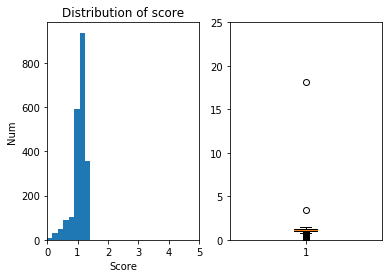

In [64]:
##plt.hist(df_visul['score'],bins=1)
plt.subplot(121)
df_visul['score'].plot.hist(bins=1000)
plt.title("Distribution of score")
plt.xlabel('Score')
plt.ylabel("Num")
plt.xlim([0,5])
plt.subplot(122)
plt.boxplot(df_visul['score'])
plt.ylim([0,25])
plt.show()
plt.close()

## 由评分箱线图可知
### 1.大多数的评分集中在0.75-1.5之间（50%）。评分都较高，接近1，甚至大于1.
### 2.大于2分的狗狗也不少，但是分布较散，最大可到8+分

In [65]:
df_visul["status_score"]=df_visul['doggo']+df_visul['floof']+df_visul['puppo']+df_visul['pupper']

In [66]:
df_visul.score[df_visul["status_score"]>0].describe()

count    383.000000
mean       1.105561
std        0.176936
min        0.300000
25%        1.000000
50%        1.100000
75%        1.200000
max        1.400000
Name: score, dtype: float64

In [67]:
# #“b”、绿色：“g”、红色：“r”、蓝绿：“c”、紫红：“m”、黄色：“y”、黑色：“k”等，
# plt.bar(status_list,status.sort_values(ascending=False)  ,color=["c","m","y","g"])
# plt.show()
# plt.close()
#构造身份统计字典
status_list = ['doggo','floof','pupper','puppo']
status_dict ={}
for status in status_list:
    status_dict[status] =sum(df_visul[status])
status = pd.Series(status_dict)

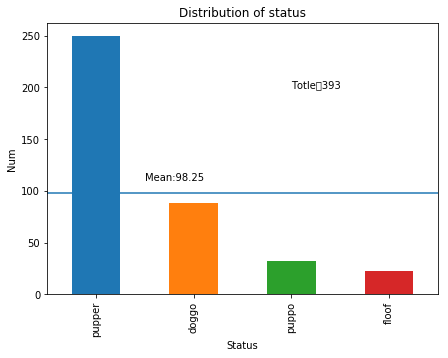

In [68]:
status_sort = status.sort_values(ascending=False)
status_sort.plot(kind='bar',figsize=(7,5))
plt.title("Distribution of status")
plt.xlabel('Status')
plt.ylabel("Num")
plt.axhline(status_sort.mean())
plt.text(1/2,110,"Mean:"+ str(status_sort.mean()))
plt.text(2,200,"Totle："+str(status_sort.sum() ))
plt.show()
plt.close()


## 由狗狗身份数量描述统计和条形图可知  
### 3.狗狗身份难得，在2000+只狗狗中，只有383只有身份！  
### 4.部分身份数量少，极其稀缺。例如blep只有一个狗狗有，snoot没有出现在这2000+只狗狗中


In [69]:
#给时间分组
# lable = ['2017年以后','2016下半年','2016上半年','2016年以前']
ct = df_visul['created_at'] 
df_visul['created_time'] =  list(map(lambda x:'2017年以后' if x>'2017-01-01' else ('2016下半年' if '2016-07-01'< x <= '2017-01-01' else ('2016上半年' if '2016-01-01'< x <='2016-07-01' else '2016年以前' ) ) , ct))

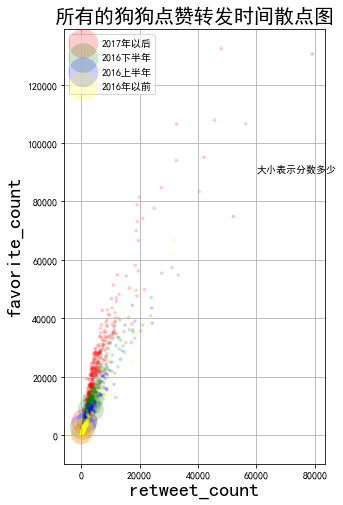

In [74]:
from pylab import mpl
 
mpl.rcParams['font.sans-serif'] = ['SimHei']   # 雅黑字体 
plt.figure(figsize=(10,8))
plt.grid(True)
plt.xlabel('retweet_count',size=20)  
plt.ylabel('favorite_count',size=20)
plt.title("所有的狗狗点赞转发时间散点图",size=20)   
plt.text(60000,90000,"大小表示分数多少")

ax22 = plt.gca()
ax22.set_aspect(1)
for color,legend in [('red','2017年以后'), ('green','2016下半年'), ('blue','2016上半年'),('yellow','2016年以前')]:
    x =  df_visul.retweet_count[df_visul['created_time']==legend]
    y =  df_visul.favorite_count[df_visul['created_time']==legend]
    size = df_visul.score
    plt.scatter(x, y, c=color,s=size*10,label=legend,alpha=0.2,edgecolors='none')
plt.legend()



### 由转发数和点赞数散点图可得
#### 5.转发数量和点赞数量基本成正比
#### 7.2017年以后发布的tweet，每一个转发带来的点赞数更多。可能原因（项目关注度）
#### 8.从下面筛选可以看出。点赞和转发都高的狗狗评分不一定高,也不一定有身份
#### 9.部分评分高的狗狗，点赞数却0。更加印证了数据有问题的猜测。

In [75]:
df_visul[df_visul.favorite_count>80000][['score','doggo','pupper','puppo',"floof"]]

,score,doggo,pupper,puppo,floof
63,1.3,0,0,0,0
71,1.3,0,0,0,0
103,1.3,0,0,0,0
119,1.3,0,1,0,0
147,1.2,0,0,0,0
348,1.3,0,0,1,0
374,1.4,0,0,0,0
445,1.3,0,0,0,0
447,1.3,0,0,0,0
862,1.3,1,0,0,0


In [76]:
#评分高的狗狗信息
df_visul[df_visul.score>2][['score','doggo','pupper','puppo',"floof"]]

,score,doggo,pupper,puppo,floof
162,42.00,0,0,0,0
163,66.60,0,0,0,0
246,18.20,0,0,0,0
429,3.43,0,0,0,0
804,177.60,0,0,0,0
1895,42.00,0,0,0,0


### 10.评分、点赞和转发前10的狗狗也不一定有身份

In [77]:
#筛选身份信息
df_visul['status']=df_visul['doggo']+df_visul['pupper']+df_visul['puppo']+df_visul['floof']
#有身份的狗狗
df_status = df_visul[['favorite_count','retweet_count','score','created_time','created_at','status']][df_visul['status']>0]

In [78]:
#有身份的狗狗描述统计
df_status.describe()

,favorite_count,retweet_count,score,status
count,383.000000,383.000000,383.000000,383.00000
mean,10203.331593,3408.973890,1.105561,1.02611
std,14688.636332,6494.427094,0.176936,0.15967
min,195.000000,3.000000,0.300000,1.00000
25%,2684.000000,831.500000,1.000000,1.00000
50%,4909.000000,1598.000000,1.100000,1.00000
75%,12116.500000,3550.000000,1.200000,1.00000
max,132318.000000,79116.000000,1.400000,2.00000


In [79]:
#所有狗狗描述统计
df_visul[['favorite_count','retweet_count','score','status']].describe()

,favorite_count,retweet_count,score,status
count,2175.000000,2175.000000,2175.000000,2175.000000
mean,8769.120000,2759.735632,1.219011,0.180690
std,12224.417865,4682.731540,4.244435,0.396622
min,52.000000,0.000000,0.000000,0.000000
25%,1904.500000,605.500000,1.000000,0.000000
50%,4023.000000,1336.000000,1.100000,0.000000
75%,11072.000000,3202.000000,1.200000,0.000000
max,132318.000000,79116.000000,177.600000,2.000000


## 有身份和没身份对比

### 11.有身份的狗狗，评分也不是很高，和上面的观察吻合
### 12.但是转发和点赞数均比整个数据集高一点。此处需要做假设检吗？应该用什么方法做假设检验

In [80]:
# from scipy import stats 
# # plt.hist(df_visul.score,bins=300)

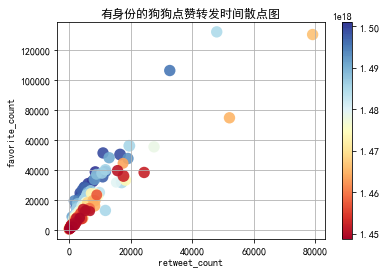

In [81]:
from pylab import mpl 
import numpy as np 
mpl.rcParams['font.sans-serif'] = ['SimHei']   # 雅黑字体 
x = df_status.retweet_count
y = df_status.favorite_count
color = pd.to_datetime(df_status.created_at)
scale =df_status.score
cm = plt.cm.get_cmap('RdYlBu')  

ax2 = plt.scatter(x,y,c=color,s=scale*100,alpha=0.9,edgecolors='none',cmap=cm)
plt.grid(True)
plt.colorbar(ax2)  

plt.xlabel('retweet_count')  
plt.ylabel('favorite_count')
plt.title("有身份的狗狗点赞转发时间散点图")  
plt.show()

   ## 由有身份的狗狗点赞转发发布时间散点图 可知
### 13.有身份的狗狗，分布和整个数据集相似
### 14.所有的有身份狗狗，评分相差不大
### 15.点赞数和转发数量最极端的几只狗狗，都是较晚发布的（橙黄色以后）。

In [82]:
df_status['created_at_ym']=df_status['created_at'].str[:7]
df_visul['created_at_ym']=df_visul['created_at'].str[:7]

Text(0,0.5,'score')

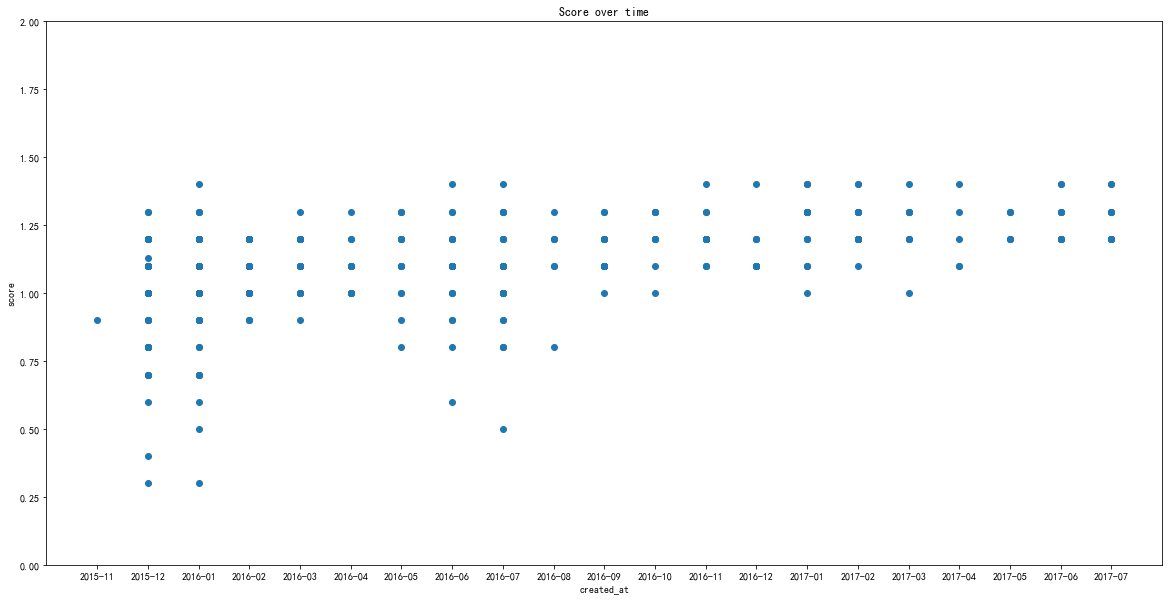

In [83]:
plt.figure(figsize=(20,10))
plt.scatter(y=df_status['score'],x=df_status['created_at_ym'],alpha=1)
plt.ylim(0,2)
plt.title('Score over time')
plt.xlabel('created_at')
plt.ylabel('score')

Text(0,0.5,'score')

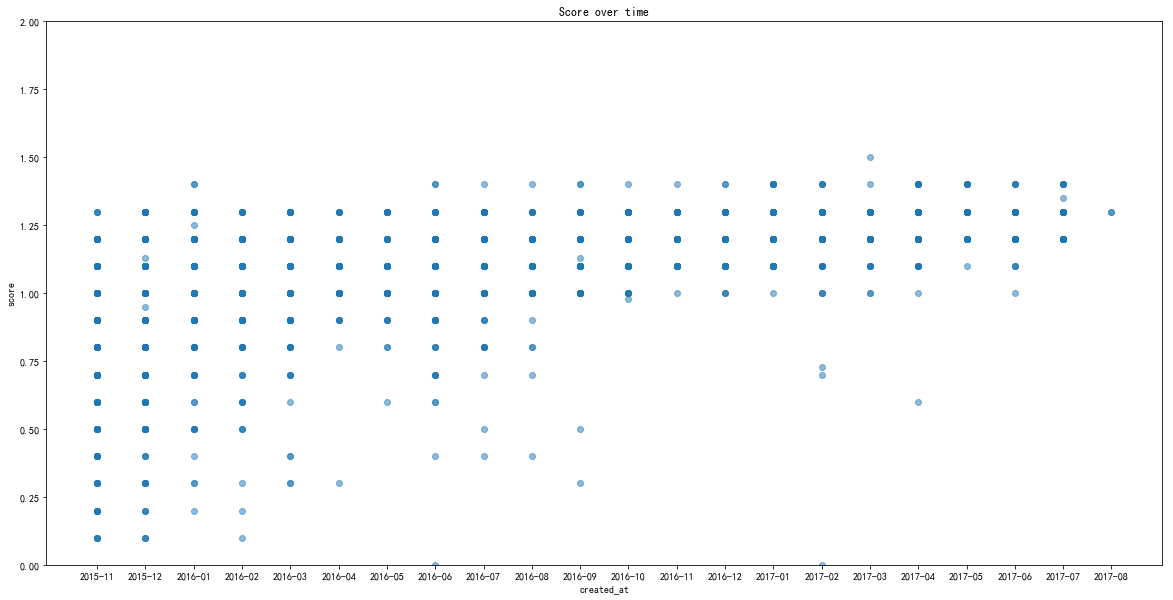

In [84]:
plt.figure(figsize=(20,10))
plt.scatter(y=df_visul['score'],x=df_visul['created_at_ym'],alpha=0.5)
plt.ylim(0,2)
plt.title('Score over time')
plt.xlabel('created_at')
plt.ylabel('score')

### 评分大多分布在1.0-1.4之间，在2016-10之后更明显，低于1.0分出现得更少了
### 猜测原因：
    主观原因：项目受到更多的关注，低分对狗狗及主人也许会有较大的影响，所以倾向于给一个相对之前较高的分数
    客观原因：项目越来越火，受到的关注更多，发照片的网友形成了一些共识，例如发些可以引人捧腹照片，而这些共识里是主办方打分的关键因素。

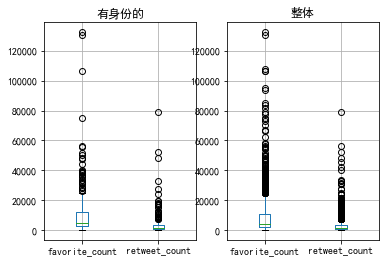

In [85]:
plt.subplot(121)
plt.title("有身份的")
df_status[['favorite_count','retweet_count']].boxplot()
plt.subplot(122)
plt.title("整体")
df_visul[['favorite_count','retweet_count']].boxplot()

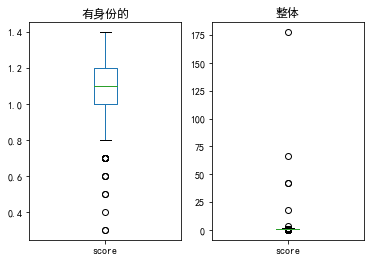

In [86]:
plt.subplot(121)
plt.title("有身份的")
df_status['score'].plot.box()
plt.subplot(122)
plt.title("整体")
df_visul['score'].plot.box()

###  有身份的狗狗，无论是在点赞数、转发数还是在评分上都比整体要高。尤其是评分的差距更为明显。即可以得出一个结论，符合某一身份的狗狗，会被给予更高的评分。

## img

In [87]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


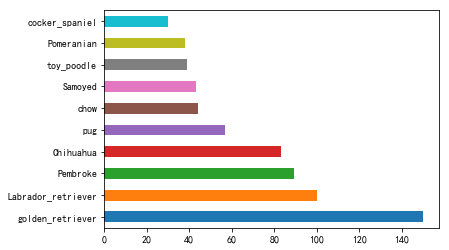

In [88]:
    df_img.p1.value_counts().head(10).plot(kind='barh')
plt.show()

In [89]:
df_merge = pd.merge(df_clean,df_img,how='inner',left_on='id',right_on='tweet_id',left_index=False)
df_merge=df_merge.drop_duplicates()
#df_merge = df_merge.reindex(range(2352))
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 24 columns):
created_at        1994 non-null datetime64[ns]
expanded_url      1994 non-null object
favorite_count    1994 non-null int32
full_text         1994 non-null object
id                1994 non-null object
retweet_count     1994 non-null int32
score             1994 non-null float64
name              1370 non-null object
doggo             1994 non-null int32
floof             1994 non-null int32
pupper            1994 non-null int32
puppo             1994 non-null int32
tweet_id          1994 non-null int64
jpg_url           1994 non-null object
img_num           1994 non-null int64
p1                1994 non-null object
p1_conf           1994 non-null float64
p1_dog            1994 non-null bool
p2                1994 non-null object
p2_conf           1994 non-null float64
p2_dog            1994 non-null bool
p3                1994 non-null object
p3_conf           1994 non-null floa

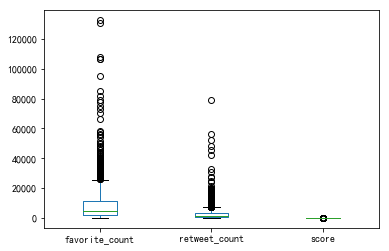

In [90]:
df_merge[df_merge['p1_dog']][['favorite_count','retweet_count',"score"]].plot.box()